**Linear Regression**

In [1]:
import pandas as pd
import numpy as np


In [2]:
df= pd.read_csv("FuelConsumptionCo2.csv")

In [3]:
df


,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


In [4]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [5]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244
5,3.5,6,11.9,7.7,10.0,230
6,3.5,6,11.8,8.1,10.1,232
7,3.7,6,12.8,9.0,11.1,255
8,3.7,6,13.4,9.5,11.6,267


In [6]:
import matplotlib.pyplot as plt

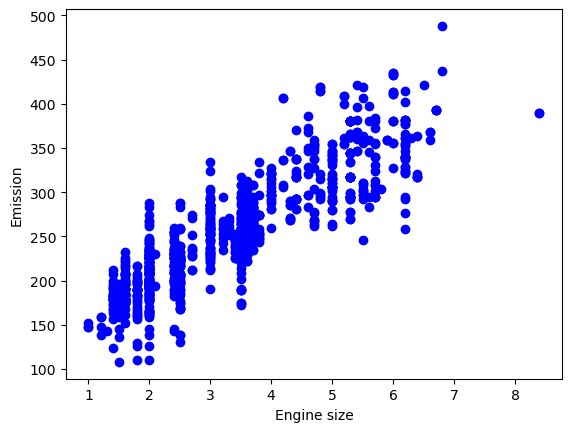

In [7]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [8]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

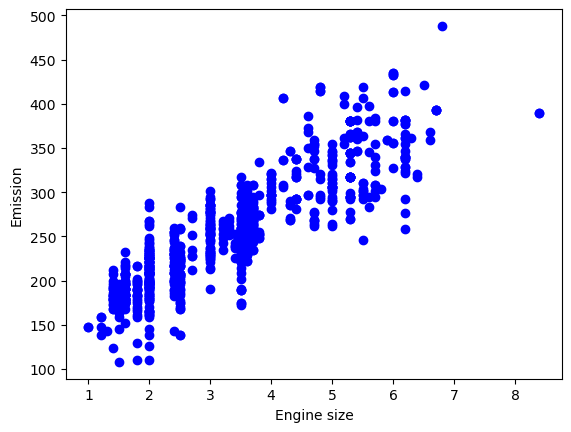

In [9]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [10]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (x, y)


# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[11.07074827  7.70499554  9.458662  ]]


In [11]:
y_hat= regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(test[['CO2EMISSIONS']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 564.97
Variance score: 0.86


In [12]:
x1= np.asanyarray(train[['FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
y1 =y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (x1, y1)

print ('Coefficients: ', regr.coef_)

Coefficients:  [[15.92607455 -3.1243582 ]]


In [13]:
y_hat1= regr.predict(test[['FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
x1 = np.asanyarray(test[['FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
y1 = np.asanyarray(test[['CO2EMISSIONS']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat1 - y1) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x1, y1))

Residual sum of squares: 787.59
Variance score: 0.80


In [14]:
from sklearn.metrics import r2_score

In [15]:
r2_1= r2_score(y1,y_hat1)



In [16]:
r2_1

0.8015822529835666

In [17]:
df

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


In [18]:
df_n = df[['CYLINDERS','ENGINESIZE','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY', 'CO2EMISSIONS' ]]

In [19]:
df_n

,CYLINDERS,ENGINESIZE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,CO2EMISSIONS
0,4,2.0,9.9,6.7,196
1,4,2.4,11.2,7.7,221
2,4,1.5,6.0,5.8,136
3,6,3.5,12.7,9.1,255
4,6,3.5,12.1,8.7,244
...,...,...,...,...,...
1062,6,3.0,13.4,9.8,271
1063,6,3.2,13.2,9.5,264
1064,6,3.0,13.4,9.8,271
1065,6,3.2,12.9,9.3,260


In [33]:
x11 = df[['ENGINESIZE','CYLINDERS']]
#x=np.array(x11)

In [34]:
y11  = df["CO2EMISSIONS"]

In [35]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model

In [36]:
x11_train, x11_test, y11_train, y11_test = train_test_split(x11, y11, test_size=0.3, random_state=42)

In [37]:
x11_train.count()

ENGINESIZE    746
CYLINDERS     746
dtype: int64

In [38]:
x11.count()

ENGINESIZE    1067
CYLINDERS     1067
dtype: int64

In [39]:
li_regre = linear_model.LinearRegression()


In [40]:
xf=np.array(x11_train)
#xf=xf.reshape([746,1])
#xf.shape

In [41]:
li_regre.fit(x11_train, y11_train)

LinearRegression()

In [29]:
#x2=np.array(x11_test)

In [42]:
ypred = li_regre.predict(x11_test)

In [44]:
r2_2= r2_score(y11_test,ypred)

r2_2

0.7881675557986823

In [46]:
x12 = df[['ENGINESIZE','FUELCONSUMPTION_CITY']]

In [47]:
x12_train, x12_test, y12_train, y12_test = train_test_split(x12, y11, test_size=0.3, random_state=42)

In [48]:
li_regre.fit(x12_train, y12_train)

LinearRegression()

In [49]:
y_pred_2 = li_regre.predict(x12_test)

In [50]:
r2_3= r2_score(y12_test,y_pred_2)

r2_3

0.8700017613891557

In [ ]:
xf_test=xf_test.reshape([321,1])

In [ ]:
y_pred = li_regre.predict(xf_test)

In [ ]:
print ('Coefficients: ', regr.coef_)

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
cv0 = KFold(n_splits=10, random_state=1, shuffle=True)
# evaluate model
scores0 = cross_val_score(li_regre, x12, y11, scoring='r2', cv=cv0, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (np.mean(scores0), np.std(scores0)))

In [ ]:
r2_1= r2_score(y11,y_hat1)